# myAOAnet

In [2]:
import os
from os.path import join
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, accuracy_score
%matplotlib inline

In [4]:
data_dir = 'data_1606'
aoa_dict = {}
#fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data5', 'field.data6', 'field.data7', 'field.data10', 'field.data11', 'field.data15']
fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data4', 'field.data5', 'field.data6', 'field.data7', \
              'field.data10', 'field.data11', 'field.data12', 'field.data13', 'field.data14', 'field.data15', \
              'field.data20', 'field.data21', 'field.data22', 'field.data23', \
              'field.data30', 'field.data31']

for filename in os.listdir(data_dir):
    if filename.startswith("deg_m") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        aoa_dict[- float(filename[5:-4])] = aoa_Rjk
    elif filename.startswith("deg_") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        aoa_dict[float(filename[4:-4])] = aoa_Rjk

In [5]:
num_fields = aoa_dict[0].shape[1]
aoa_dict[0].head(50)

,field.data0,field.data1,field.data2,field.data3,field.data4,field.data5,field.data6,field.data7,field.data10,field.data11,field.data12,field.data13,field.data14,field.data15,field.data20,field.data21,field.data22,field.data23,field.data30,field.data31
0,7.666858e-08,0.0,2.870847e-08,-4.286403e-09,-4.063577e-08,-3.996029e-08,5.745779e-09,-9.190084e-08,0.000004,0.0,-1.089253e-07,-1.703348e-07,1.805027e-08,-3.614795e-07,0.000005,0.0,5.031552e-07,5.018484e-07,0.000005,0.0
1,7.531266e-08,0.0,3.245228e-08,-3.916736e-10,-4.040302e-08,-3.290519e-08,8.592314e-09,-8.882998e-08,0.000004,0.0,-1.271434e-07,-1.307816e-07,5.724483e-08,-3.316083e-07,0.000005,0.0,4.963708e-07,5.642001e-07,0.000005,0.0
2,7.588948e-08,0.0,3.180056e-08,5.191419e-09,-4.132120e-08,-3.589397e-08,4.872057e-09,-9.745519e-08,0.000004,0.0,-1.400175e-07,-1.255275e-07,6.210496e-08,-4.016582e-07,0.000005,0.0,4.443870e-07,6.074567e-07,0.000005,0.0
3,7.457187e-08,0.0,3.099723e-08,-3.193643e-10,-3.700229e-08,-3.373279e-08,1.785910e-09,-8.843575e-08,0.000004,0.0,-1.321670e-07,-1.303623e-07,7.287748e-08,-3.352868e-07,0.000005,0.0,4.859778e-07,4.976154e-07,0.000005,0.0
4,7.577018e-08,0.0,2.757032e-08,-1.282692e-09,-4.205080e-08,-3.180738e-08,5.389584e-09,-9.226090e-08,0.000004,0.0,-9.666718e-08,-1.173304e-07,7.646621e-08,-3.734494e-07,0.000005,0.0,4.574219e-07,5.809664e-07,0.000005,0.0
5,7.528805e-08,0.0,3.513028e-08,-6.089565e-11,-4.178012e-08,-3.318065e-08,1.003521e-08,-9.472239e-08,0.000004,0.0,-1.230802e-07,-1.437402e-07,3.939213e-08,-3.631214e-07,0.000005,0.0,5.217113e-07,5.123710e-07,0.000005,0.0
6,7.575626e-08,0.0,3.804680e-08,5.229464e-09,-4.279267e-08,-3.260863e-08,8.854135e-09,-9.949872e-08,0.000004,0.0,-1.389792e-07,-1.128212e-07,5.615719e-08,-3.984154e-07,0.000005,0.0,4.080420e-07,5.483967e-07,0.000005,0.0
7,7.580216e-08,0.0,2.718681e-08,-3.887301e-09,-3.904420e-08,-3.563963e-08,2.758547e-09,-9.627834e-08,0.000004,0.0,-1.209765e-07,-1.443218e-07,7.443288e-08,-3.504103e-07,0.000005,0.0,4.786470e-07,5.574987e-07,0.000005,0.0
8,7.426785e-08,0.0,3.202805e-08,1.522963e-09,-4.034196e-08,-3.221040e-08,3.395303e-09,-9.191432e-08,0.000004,0.0,-1.020383e-07,-1.174796e-07,6.139486e-08,-3.939927e-07,0.000005,0.0,5.209081e-07,5.165060e-07,0.000005,0.0
9,7.544370e-08,0.0,3.095279e-08,-1.482771e-09,-4.216148e-08,-3.394742e-08,7.034481e-09,-9.015962e-08,0.000004,0.0,-9.089888e-08,-1.660830e-07,6.404755e-08,-3.710307e-07,0.000005,0.0,4.453267e-07,5.382586e-07,0.000005,0.0


In [6]:
#Degree to Radian
for key in aoa_dict.keys():
    aoa_dict[key]['theta'] = key * math.pi / 180

# Show detection of LoRa beacon when Rjk is significant
field_thres = 1e-04

for key in aoa_dict.keys():
    print("%s shape of signal-presenting snapshots = %.01f" % (str(aoa_dict[key][abs(aoa_dict[key]['field.data2']) >= field_thres].shape), key))

(226, 21) shape of signal-presenting snapshots = 0.0
(248, 21) shape of signal-presenting snapshots = 60.0
(195, 21) shape of signal-presenting snapshots = -50.0
(238, 21) shape of signal-presenting snapshots = -60.0
(182, 21) shape of signal-presenting snapshots = -40.0
(203, 21) shape of signal-presenting snapshots = 20.0
(225, 21) shape of signal-presenting snapshots = 70.0
(214, 21) shape of signal-presenting snapshots = 40.0
(186, 21) shape of signal-presenting snapshots = 30.0
(270, 21) shape of signal-presenting snapshots = -30.0
(209, 21) shape of signal-presenting snapshots = -70.0
(222, 21) shape of signal-presenting snapshots = -20.0
(255, 21) shape of signal-presenting snapshots = 10.0
(259, 21) shape of signal-presenting snapshots = -10.0
(233, 21) shape of signal-presenting snapshots = 50.0


/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Differentiate R of LoRa signal or noise
aoa_sig, aoa_noi = {}, {}
sig_index_lst = {}

for key in aoa_dict.keys():
    aoa_sig[key] = aoa_dict[key].drop(aoa_dict[key][abs(aoa_dict[key]['field.data2']) < field_thres].index)
    aoa_noi[key] = aoa_dict[key].drop(aoa_dict[key][abs(aoa_dict[key]['field.data2']) >= field_thres].index)
    
    sig_index_lst[key] = (aoa_dict[key][abs(aoa_dict[key]['field.data2']) >= field_thres].index)
    
sig_index_lst[0]

Int64Index([ 19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
            ...
            718, 719, 720, 721, 722, 723, 724, 725, 726, 727],
           dtype='int64', length=226)

In [8]:
# Xaoa = aoa_sig <-> theta[Rad]
Xaoa = pd.concat([aoa_sig[rad] for rad in range(-70, 80, 10)], keys=[rad for rad in range(-70, 80, 10)], names=['Series name', 'Row ID'])
idx = pd.IndexSlice

In [9]:
print(Xaoa.shape)
Xaoa.loc[idx[[-10, 0, 30, 70], :], :]
Xaoa

(3365, 21)


field.data0  field.data1  field.data2  field.data3  \
Series name Row ID                                                       
-70         0          0.000046          0.0     0.002728     0.000348   
            1          0.000032          0.0     0.002230     0.000289   
            2          0.000008          0.0     0.000627     0.000079   
            27         0.000004          0.0     0.000310     0.000150   
            28         0.000120          0.0    -0.000454    -0.003152   
...                         ...          ...          ...          ...   
 70         707        0.002506          0.0     0.003383     0.023918   
            708        0.002359          0.0     0.003174     0.022460   
            709        0.001897          0.0     0.002347     0.017940   
            710        0.001451          0.0     0.001547     0.013673   
            711        0.000982          0.0     0.000807     0.009173   

                    field.data4  field.data5  field.data6  field.data7  \
Series name Row ID                                                       
-70         0          0.001615    -0.000416     0.001171    -0.000044   
            1          0.001354    -0.000339     0.001016    -0.000039   
            2          0.000384    -0.000098     0.000293    -0.000017   
            27         0.000223     0.000034     0.000113     0.000085   
            28        -0.000799    -0.001858     0.000271    -0.001878   
...                         ...          ...          ...          ...   
 70         707       -0.016969     0.003560     0.009624    -0.030561   
            708       -0.016128     0.003234     0.009060    -0.029390   
            709       -0.013109     0.002452     0.008144    -0.025374   
            710       -0.010135     0.001830     0.006969    -0.020548   
            711       -0.006896     0.001067     0.005356    -0.014184   

                    field.data10  field.data11  ...  field.data13  \
Series name Row ID                              ...                 
-70         0           0.165659           0.0  ...     -0.037592   
            1           0.161718           0.0  ...     -0.037243   
            2           0.050502           0.0  ...     -0.011764   
            27          0.028097           0.0  ...     -0.005342   
            28          0.165926           0.0  ...     -0.029510   
...                          ...           ...  ...           ...   
 70         707         0.233392           0.0  ...      0.166462   
            708         0.218569           0.0  ...      0.157591   
            709         0.172999           0.0  ...      0.126773   
            710         0.130789           0.0  ...      0.097287   
            711         0.086527           0.0  ...      0.065134   

                    field.data14  field.data15  field.data20  field.data21  \
Series name Row ID                                                           
-70         0           0.069720     -0.011793      0.061505           0.0   
            1           0.072078     -0.012540      0.062923           0.0   
            2           0.023049     -0.004381      0.020062           0.0   
            27          0.011273      0.002239      0.011953           0.0   
            28          0.082327      0.023186      0.068399           0.0   
...                          ...           ...           ...           ...   
 70         707        -0.278442     -0.132870      0.120211           0.0   
            708        -0.267317     -0.125657      0.114910           0.0   
            709        -0.229677     -0.108304      0.093950           0.0   
            710        -0.186047     -0.087480      0.073229           0.0   
            711        -0.127907     -0.061592      0.049657           0.0   

                    field.data22  field.data23  field.data30  field.data31  \
Series name Row ID                                                           
-70         0           0

### MUSIC

In [10]:
# Notice Noisy Rosbags do not contain 'kerberos/doa_results'
data_dir = 'data_1606'
music_dict = {}

for filename in os.listdir(data_dir):
    if filename.startswith("music_deg_m") and filename.endswith(".csv"):
        music_deg = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        music_deg.rename(columns = {'field.data': 'music'}, inplace=True)
        music_series = music_deg['music']
        music_dict[- float(filename[11:-4])] = music_series
    elif filename.startswith("music_deg_") and filename.endswith(".csv"):
        music_deg = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        music_deg.rename(columns = {'field.data': 'music'}, inplace=True)
        music_series = music_deg['music']
        music_dict[float(filename[10:-4])] = music_series

In [11]:
for key in music_dict.keys():
    music_dict[key] = music_dict[key][sig_index_lst[key]]

In [33]:
# Add MUSIC_results as 22nd column
Xmusic = pd.concat([music_dict[rad] for rad in range(-70, 80, 10)], keys=[rad for rad in range(-70, 80, 10)], names=['Series name', 'Row ID'])
Xaoa_music = pd.concat([Xaoa, Xmusic], axis=1)
Xmusic

Series name  Row ID
-70          0           2.0
             1           2.0
             2           2.0
             27        359.0
             28        359.0
                       ...  
 70          707       331.0
             708       331.0
             709       331.0
             710       331.0
             711       331.0
Name: music, Length: 3365, dtype: float64

In [14]:
Xaoa_music.to_csv(join(data_dir, 'df_collection', 'LOS_MUSIC.csv'), index=True, header=True)

## Create Origin-Noisy-MUSIC dataset

In [42]:
data_dir = join('data_1606', 'noisy')
#field_thres = 1e-04

def create_dataset(sigma, Xmusic=Xmusic):
    aoa_dict = {}
    #fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data5', 'field.data6', 'field.data7', 'field.data10', 'field.data11', 'field.data15']
    fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data4', 'field.data5', 'field.data6', 'field.data7', \
                  'field.data10', 'field.data11', 'field.data12', 'field.data13', 'field.data14', 'field.data15', \
                  'field.data20', 'field.data21', 'field.data22', 'field.data23', \
                  'field.data30', 'field.data31']

    for filename in os.listdir(data_dir):
        if filename.startswith("deg_m") and filename.endswith("_" + sigma + ".csv"):
            aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
            aoa_Rjk = aoa[fields_lst]
            aoa_dict[- float(filename[5:-9])] = aoa_Rjk
        elif filename.startswith("deg_") and filename.endswith("_" + sigma + ".csv"):
            aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
            aoa_Rjk = aoa[fields_lst]
            aoa_dict[float(filename[4:-9])] = aoa_Rjk
    
    aoa_sig, aoa_noi = {}, {}
    #sig_index_lst = {}
            
    for key in aoa_dict.keys():
        aoa_dict[key]['theta'] = key * math.pi / 180
        aoa_sig[key] = aoa_dict[key].iloc[sig_index_lst[key], :]
    
    Xaoa_noi = pd.concat([aoa_sig[rad] for rad in range(-70, 80, 10)], \
                     keys=[rad for rad in range(-70, 80, 10)], names=['Series name', 'Row ID'])
    
    Xaoa_noi_music = pd.concat([Xaoa_noi, Xmusic], axis=1)
    return Xaoa_noi_music
    

In [43]:
Xaoa1 = create_dataset('1e_5', Xmusic)
Xaoa2 = create_dataset('5e_5', Xmusic)
Xaoa3 = create_dataset('1e_4', Xmusic)
Xaoa4 = create_dataset('5e_4', Xmusic)

X = pd.concat([Xaoa_music, Xaoa1, Xaoa2, Xaoa3, Xaoa4], axis=0)

/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [45]:
X.shape

(16825, 22)

In [47]:
X.to_csv(join('data_1606', 'df_collection', '1LOS.csv'), index=True, header=True)

### Save/Load DataFrame

In [49]:
load_dir = join('data_1606', 'df_collection')

In [50]:
df_lst = []
df_type = "1LOS"

for filename in os.listdir(load_dir):
    if filename.startswith(df_type) and filename.endswith(".csv"):
        print("Loading DF: ", filename)
        Xaoa0 = pd.read_csv(join(load_dir, filename), index_col=[0, 1])
        df_lst.append(Xaoa0)

Loading DF:  1LOS.csv


In [51]:
Xaoa = df_lst[0]
df_lst[0].head(10)

field.data0  field.data1  field.data2  field.data3  \
Series name Row ID                                                       
-70         0          0.000046          0.0     0.002728     0.000348   
            1          0.000032          0.0     0.002230     0.000289   
            2          0.000008          0.0     0.000627     0.000079   
            27         0.000004          0.0     0.000310     0.000150   
            28         0.000120          0.0    -0.000454    -0.003152   
            29         0.000464          0.0    -0.006122    -0.000039   
            30         0.000519          0.0    -0.005092     0.006812   
            31         0.000481          0.0    -0.001118     0.009971   
            32         0.000110          0.0    -0.001813     0.003157   
            33         0.000306          0.0    -0.001411     0.006338   

                    field.data4  field.data5  field.data6  field.data7  \
Series name Row ID                                                       
-70         0          0.001615    -0.000416     0.001171    -0.000044   
            1          0.001354    -0.000339     0.001016    -0.000039   
            2          0.000384    -0.000098     0.000293    -0.000017   
            27         0.000223     0.000034     0.000113     0.000085   
            28        -0.000799    -0.001858     0.000271    -0.001878   
            29        -0.003498     0.001458    -0.001950    -0.001995   
            30        -0.002057     0.005848    -0.002810     0.001495   
            31         0.000050     0.006908    -0.003182     0.003371   
            32        -0.001001     0.002145    -0.002003     0.000582   
            33        -0.000078     0.003641    -0.002418     0.000670   

                    field.data10  field.data11  ...  field.data14  \
Series name Row ID                              ...                 
-70         0           0.165659           0.0  ...      0.069720   
            1           0.161718           0.0  ...      0.072078   
            2           0.050502           0.0  ...      0.023049   
            27          0.028097           0.0  ...      0.011273   
            28          0.165926           0.0  ...      0.082327   
            29          0.094349           0.0  ...      0.032767   
            30          0.146118           0.0  ...      0.048959   
            31          0.215421           0.0  ...      0.078268   
            32          0.188726           0.0  ...      0.077243   
            33          0.179587           0.0  ...      0.036873   

                    field.data15  field.data20  field.data21  field.data22  \
Series name Row ID                                                           
-70         0          -0.011793      0.061505           0.0      0.042218   
            1          -0.012540      0.062923           0.0      0.044782   
            2          -0.004381      0.020062           0.0      0.014547   
            27          0.002239      0.011953           0.0      0.006618   
            28          0.023186      0.068399           0.0      0.046785   
            29          0.027427      0.037424           0.0      0.012927   
            30          0.024198      0.075845           0.0      0.028818   
            31          0.060378      0.100297           0.0      0.048531   
            32          0.068770      0.072338           0.0      0.043603   
            33          0.054937      0.055029           0.0      0.013459   

                    field.data23  field.data30  field.data31    theta  music  
Series name Row ID                                                            
-70         0           0.009268      0.030411           0.0 -1.22173    2.0  
            1           0.009444      0.033308           0.0 -1.22173    2.0  
            2           0.002833      0.010959           0.0 -1.22173    2.0  
            27          0.003549      0.004729           0.0 -1.22173  359.0  
  

In [52]:
df_lst[0].shape

(16825, 22)

## Preparation

### Add Gaussian Noise

In [35]:
# Corrupt R directly!?
'''
noise = np.random.normal(0, 0.0001, Xaoa.shape)
Xaoa_noisy = Xaoa + noise
'''

In [107]:
def Split_TimeSeries3(Xaoa, aoa_gt_series=range(-70, 80, 10)):
    # Xarr: time series of Rjk
    Xaoa_cpy = Xaoa.copy(deep=True)

    Xarr, ylst = np.empty((0, 3, 20), dtype='float32'), []
    rowt_0, rowt_1, rowt_2 = None, None, None
    row_up, row_mid, row_down = -1, -1, -1

    for serName in aoa_gt_series:
        isFirstRow = True
        isSecRow = True
        for rowId, row in Xaoa_cpy.loc[serName].iterrows():
            row_up = row_mid
            rowt_2 = rowt_1
            row_mid = row_down
            rowt_1 = rowt_0
            row_down = rowId
            
            rowt_0 = row.drop(['theta', 'music']).to_numpy(dtype='float32').reshape(1, 1, 20)
            if isFirstRow:
                isFirstRow = False
                continue

            if isSecRow:
                isSecRow = False
                continue

            if row_down-row_mid==1 and row_mid-row_up==1:
                arr_tmp = np.concatenate((rowt_2, rowt_1, rowt_0), axis=1)

                Xarr = np.append(Xarr, arr_tmp, axis=0)
                ylst.append([row['theta'], row['music']])

    # Xvec: slice of a Rjk row
    Xvec = Xaoa_cpy.drop(['theta', 'music'], axis=1).to_numpy()
    yvec = Xaoa_cpy['theta'].to_numpy()
                
    print(Xarr.shape, len(ylst))
    return Xarr, ylst, Xvec, yvec

In [54]:
Xarr = np.array([])
yarr = np.array([])
for item in df_lst:
    Xarr0, ylst0, Xvec, yvec = Split_TimeSeries3(item)
    Xarr = np.concatenate((Xarr, Xarr0), axis=0) if Xarr.size else Xarr0
    yarr0 = np.array(ylst0)
    yarr = np.concatenate((yarr, yarr0), axis=0) if yarr.size else yarr0

print(Xarr.shape)
print(yarr.shape)

(13575, 3, 20) 13575
(13575, 3, 20)
(13575, 2)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(Xarr, yarr, test_size=0.2, random_state=42)

In [56]:
y_test.shape

(2715, 2)

In [57]:
# Split Label (theta) and y_test_music (music) from yarr
y_test_music = []
for item in y_test:
    if item[1] > 180.0:
        item[1] -= 360
    y_test_music.append(item[1])
y_train_music = [item[1] for item in y_train]
y_train = [item[0] for item in y_train]
y_test = [item[0] for item in y_test]

In [121]:
y_test

[-1.2217304763960306,
 1.2217304763960306,
 1.0471975511965976,
 -0.6981317007977318,
 0.3490658503988659,
 1.0471975511965976,
 0.8726646259971648,
 -0.6981317007977318,
 1.0471975511965976,
 -0.5235987755982988,
 0.6981317007977318,
 -0.6981317007977318,
 1.0471975511965976,
 -0.6981317007977318,
 -0.8726646259971648,
 -1.2217304763960306,
 -0.3490658503988659,
 0.0,
 -1.2217304763960306,
 0.1745329251994329,
 -1.2217304763960306,
 -0.6981317007977318,
 -1.0471975511965976,
 -1.2217304763960306,
 -1.0471975511965976,
 1.0471975511965976,
 -0.3490658503988659,
 0.0,
 -0.8726646259971648,
 -1.2217304763960306,
 0.1745329251994329,
 -0.3490658503988659,
 -0.5235987755982988,
 1.0471975511965976,
 -0.5235987755982988,
 -1.0471975511965976,
 0.0,
 0.3490658503988659,
 -0.1745329251994329,
 -0.5235987755982988,
 1.2217304763960306,
 -1.2217304763960306,
 -0.6981317007977318,
 1.0471975511965976,
 1.2217304763960306,
 1.0471975511965976,
 0.3490658503988659,
 1.2217304763960306,
 -0.5235987

In [59]:
# Normalization
mmsc = MinMaxScaler()
mmsc.fit(X_train.reshape(-1, X_train.shape[-1]))
X_train_std = mmsc.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_std = mmsc.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [60]:
ymax = max(y_train)
ymin = min(y_train)
y_train_std = (y_train - ymin)/(ymax-ymin)
y_test_std = (y_test - ymin)/(ymax-ymin)

In [61]:
len(y_test_music)

2715

## Training
### LSTM

In [62]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add, LSTM, RepeatVector, TimeDistributed
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers, Sequential
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils, plot_model

Using TensorFlow backend.
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zdai/anaconda3/envs/

In [63]:
time_steps = 3
feature_dim = 20

# define model LSTM-only
x = Input(shape=(time_steps, feature_dim))
h1 = LSTM(128, activation='relu', return_sequences=True)(x)
h2 = LSTM(64, activation='relu')(h1)
h3 = Dense(9, activation='relu')(h2)
r = Dense(1, activation='sigmoid')(h3)

model = Model(inputs=x, outputs=r)
model.compile(optimizer='adam', loss='mse')
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 585       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 126,291
Trainable params: 126,291
Non-trainable params: 0
_________________________________________________________________


In [64]:
epochs = 20
batch_size = 50

history = model.fit(X_train_std, y_train_std, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_std, y_test_std))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 10860 samples, validate on 2715 samples
Epoch 1/20
10860/10860 [==============================] - 5s 465us/step - loss: 0.0153 - val_loss: 0.0014
Epoch 2/20
10860/10860 [==============================] - 3s 255us/step - loss: 8.3583e-04 - val_loss: 4.4027e-04
Epoch 3/20
10860/10860 [==============================] - 3s 255us/step - loss: 3.1899e-04 - val_loss: 2.2144e-04
Epoch 4/20
10860/10860 [==============================] - 3s 258us/step - loss: 2.0372e-04 - val_loss: 1.4961e-04
Epoch 5/20
10860/10860 [==============================] - 3s 260us/step - loss: 1.4329e-04 - val_loss: 1.0669e-04
Epoch 6/20
10860/10860 [==============================] - 3s 255us/step - loss: 1.0889e-04 - val_loss: 8.3743e-05
Epoch 7/20
10860/10860 [==============================] - 3s 255us/step - loss: 9.5394e-05 - val_loss: 6.7731e-05
Epoch 8/20
10860/10860 [==============================] - 3s 258u

dict_keys(['val_loss', 'loss'])


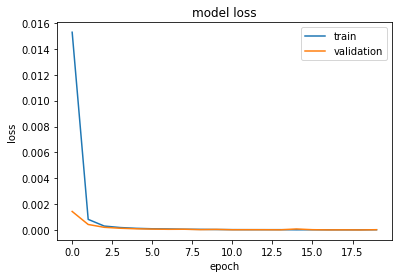

In [65]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [66]:
pred_y_test_std = model.predict(X_test_std)
pred_y_test = pred_y_test_std*(ymax-ymin) + ymin
pred_y_test_std.shape

(2715, 1)

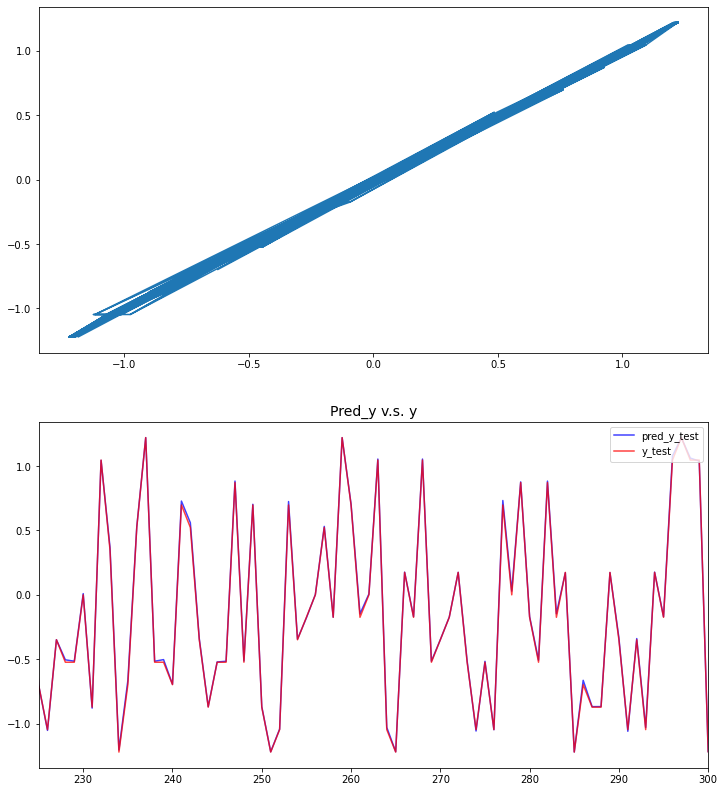

In [67]:
fig ,ax_lst = plt.subplots(2, 1,figsize=(12,14))
ax_lst[0].plot(pred_y_test, y_test)
ax_lst[1].plot([i for i in range(pred_y_test.shape[0])], list(pred_y_test), color='b', alpha=0.75, label='pred_y_test')
ax_lst[1].plot(y_test, color='red', alpha=0.75, label='y_test')
ax_lst[1].set_title(f"Pred_y v.s. y",fontsize=14)
ax_lst[1].grid(False)
ax_lst[1].legend(loc='upper right')
ax_lst[1].set_xlim([225, 300])
plt.show()

In [68]:
rmse_lstm = np.sqrt(mean_squared_error(y_test, pred_y_test))
print("RMSE of LSTM-only: ", rmse_lstm)
print("I.E. %.04f degree of mean error" % (rmse_lstm/math.pi*180))

RMSE of LSTM-only:  0.01437932316234696
I.E. 0.8239 degree of mean error


### LSTM-Autoencoder

In [69]:
time_steps = 3
feature_dim = 20

x0 = Input(shape=(time_steps, feature_dim))
l1 = LSTM(128, activation='relu', return_sequences=True)(x0)
l2 = LSTM(64, activation='relu', return_sequences=False)(l1)
h0 = RepeatVector(time_steps)(l2)
l3 = LSTM(64, activation='relu', return_sequences=True)(h0)
l4 = LSTM(128, activation='relu', return_sequences=True)(l3)
r0 = TimeDistributed(Dense(feature_dim))(l4)

LSTM_AE = Model(inputs=x0, outputs=r0)
LSTM_AE.compile(optimizer='adam', loss='mse')
LSTM_AE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 64)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 64)             33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 3, 128)            98816     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 3, 20)             2580      
Total para

In [70]:
epochs=20
batch_size = 50

LSTM_AE.fit(X_train_std, X_train_std, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test_std, X_test_std))

Train on 10860 samples, validate on 2715 samples
Epoch 1/20
10860/10860 [==============================] - 9s 848us/step - loss: 0.0629 - val_loss: 0.0183
Epoch 2/20
10860/10860 [==============================] - 5s 485us/step - loss: 0.0070 - val_loss: 0.0032
Epoch 3/20
10860/10860 [==============================] - 5s 481us/step - loss: 0.0027 - val_loss: 0.0023
Epoch 4/20
10860/10860 [==============================] - 5s 489us/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/20
10860/10860 [==============================] - 5s 503us/step - loss: 0.0011 - val_loss: 9.3587e-04
Epoch 6/20
10860/10860 [==============================] - 5s 492us/step - loss: 8.5497e-04 - val_loss: 7.1521e-04
Epoch 7/20
10860/10860 [==============================] - 5s 497us/step - loss: 6.7089e-04 - val_loss: 5.9614e-04
Epoch 8/20
10860/10860 [==============================] - 5s 502us/step - loss: 5.5199e-04 - val_loss: 5.1177e-04
Epoch 9/20
10860/10860 [==============================] - 6s 507us/step - l

In [71]:
pred_X_test_std = LSTM_AE.predict(X_test_std, verbose=0)
print('---Predicted---')
print(np.round(pred_X_test_std, 4))
print('---Actual---')
print(np.round(X_test_std, 4))

---Predicted---
[[[ 3.110e-02  2.100e-03  2.394e-01 ...  4.446e-01  7.780e-02  1.520e-02]
  [ 2.910e-02  5.300e-03  2.715e-01 ...  4.374e-01  9.240e-02  3.800e-03]
  [ 3.580e-02  7.000e-03  2.672e-01 ...  4.424e-01  1.014e-01 -4.200e-03]]

 [[ 3.069e-01 -1.100e-03  2.947e-01 ...  6.688e-01  7.646e-01  2.800e-03]
  [ 3.298e-01 -3.100e-03  3.300e-01 ...  7.033e-01  8.513e-01 -1.800e-03]
  [ 3.599e-01 -2.700e-03  3.569e-01 ...  7.269e-01  9.028e-01 -4.500e-03]]

 [[ 3.416e-01 -1.100e-03  6.314e-01 ...  8.509e-01  9.807e-01 -5.000e-04]
  [ 3.410e-01 -3.400e-03  6.097e-01 ...  8.281e-01  9.626e-01 -2.500e-03]
  [ 3.074e-01 -7.000e-04  5.768e-01 ...  7.980e-01  9.017e-01 -7.000e-04]]

 ...

 [[ 3.620e-02 -1.170e-02  7.690e-02 ...  4.246e-01  8.110e-02 -7.200e-03]
  [ 4.110e-02 -6.400e-03  6.260e-02 ...  4.408e-01  9.460e-02  1.800e-03]
  [ 4.570e-02  1.800e-03  7.260e-02 ...  4.246e-01  8.700e-02  1.060e-02]]

 [[ 7.263e-01 -3.700e-03  8.399e-01 ...  8.432e-01  9.773e-01 -9.400e-03]
  [ 7.43

In [72]:
encoder = Model(inputs=x0, outputs=l2)
encoder.compile(optimizer='adam', loss='mse')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
Total params: 125,696
Trainable params: 125,696
Non-trainable params: 0
_________________________________________________________________


In [73]:
pred_encoded_X_train_std = encoder.predict(X_train_std)
pred_encoded_X_test_std = encoder.predict(X_test_std)
pred_encoded_X_test_std.shape

(2715, 64)

### SVR on Encoded R-features

In [74]:
# SVR
svr_3 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.3)
svr_3.fit(pred_encoded_X_train_std, y_train)
svr_3.score(pred_encoded_X_test_std, y_test)

0.9669535374409767

In [75]:
'''
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_3,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(pred_encoded_X_train_std, y_train)
print(grid.best_estimator_)
print(grid.best_score_)
'''

"\nparams = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}\ngrid = GridSearchCV(svr_3,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)\ngrid.fit(pred_encoded_X_train_std, y_train)\nprint(grid.best_estimator_)\nprint(grid.best_score_)\n"

In [76]:
svr_best3 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.01)
svr_best3.fit(pred_encoded_X_train_std, y_train)
svr_best3.score(pred_encoded_X_test_std, y_test)

0.9987305628824317

In [77]:
pred_EncodeSVR_y_test = svr_best3.predict(pred_encoded_X_test_std)
rmse3 = np.sqrt(mean_squared_error(y_test, pred_EncodeSVR_y_test))
print("RMSE for SVR3:", rmse3)
print("I.E. %.04f degree of mean error" % (rmse3/math.pi*180))

RMSE for SVR3: 0.02671360696132398
I.E. 1.5306 degree of mean error


In [78]:
len(y_test)

2715

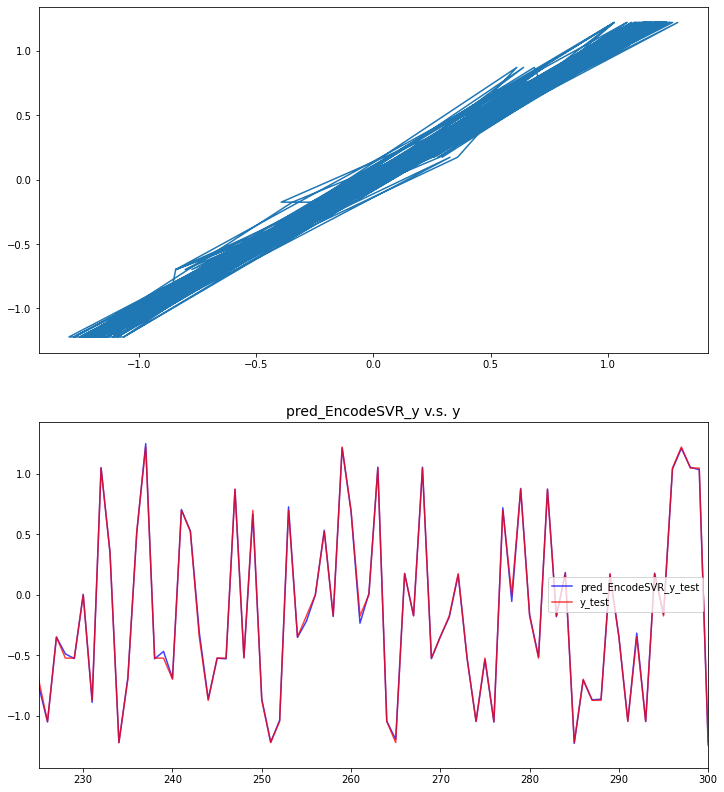

In [79]:
fig ,ax_lst = plt.subplots(2, 1,figsize=(12,14))
ax_lst[0].plot(pred_EncodeSVR_y_test, y_test)
ax_lst[1].plot([i for i in range(pred_EncodeSVR_y_test.shape[0])], list(pred_EncodeSVR_y_test), color='b', alpha=0.75, label='pred_EncodeSVR_y_test')
ax_lst[1].plot(y_test, color='red', alpha=0.75, label='y_test')
ax_lst[1].set_title(f"pred_EncodeSVR_y v.s. y",fontsize=14)
ax_lst[1].grid(False)
ax_lst[1].legend(loc='best')
ax_lst[1].set_xlim([225, 300])
plt.show()

### CDF

In [80]:
y_err_series = pd.Series(abs(y_test - pred_EncodeSVR_y_test) / math.pi*180)

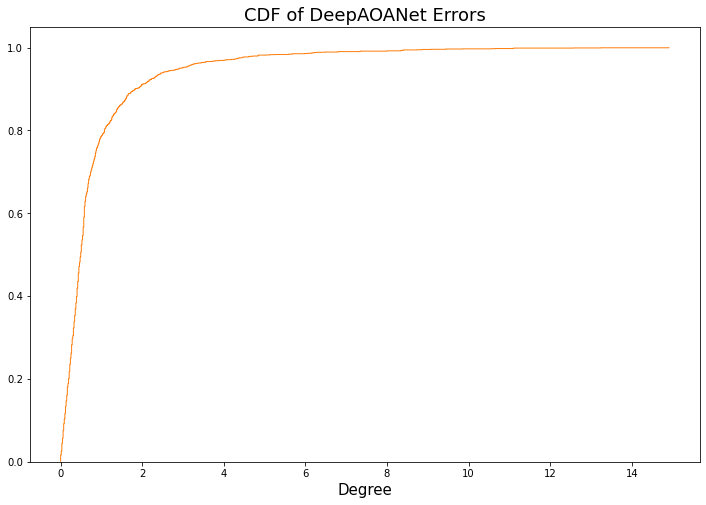

In [81]:
fig_hist, ax_hist = plt.subplots(1,1, figsize=(12,8))
n, bins, patches = ax_hist.hist(y_err_series, density=True, cumulative = True, histtype='step', bins=1000, color='tab:orange')
patches[0].set_xy(patches[0].get_xy()[:-1])
ax_hist.set_title("CDF of DeepAOANet Errors", fontsize=18)
ax_hist.set_xlabel("Degree", fontsize=15)
plt.show()

### Directly apply SVR on Rjk

In [82]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(Xvec, yvec, test_size=0.2, random_state=42)

In [83]:
svr_0 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.01)
svr_0.fit(X_train0, y_train0)
svr_0.score(X_test0, y_test0)

0.9780749041620128

In [84]:
pred_SVR0_y_test = svr_0.predict(X_test0)
rmse0 = np.sqrt(mean_squared_error(y_test0, pred_SVR0_y_test))
print("RMSE for SVR0:", rmse0)
print("I.E. %.04f degree of mean error" % (rmse0/math.pi*180))

RMSE for SVR0: 0.11185163990608234
I.E. 6.4086 degree of mean error


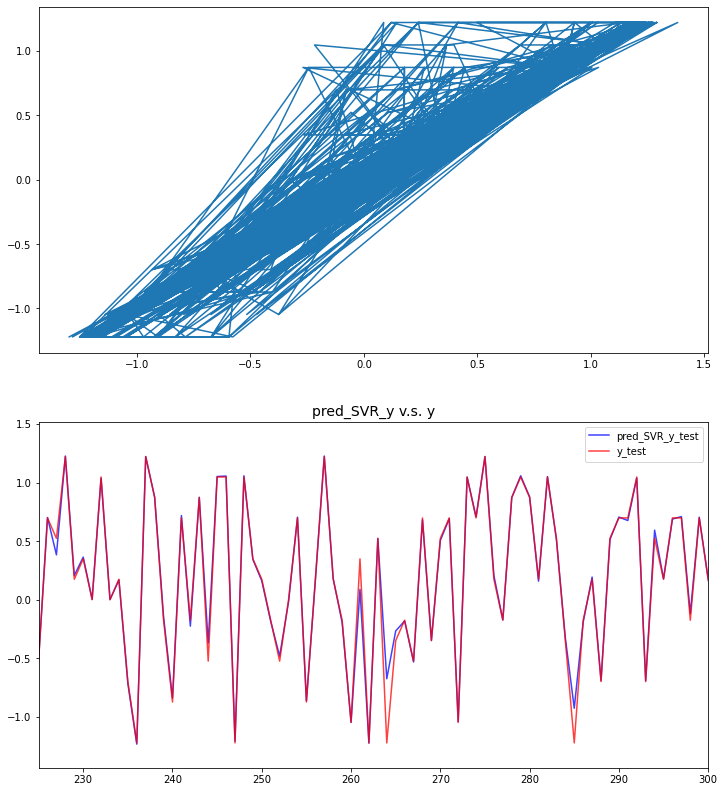

In [85]:
fig0 ,ax_lst0 = plt.subplots(2, 1,figsize=(12,14))
ax_lst0[0].plot(pred_SVR0_y_test, y_test0)
ax_lst0[1].plot([i for i in range(pred_SVR0_y_test.shape[0])], list(pred_SVR0_y_test), color='b', alpha=0.75, label='pred_SVR_y_test')
ax_lst0[1].plot(y_test0, color='red', alpha=0.75, label='y_test')
ax_lst0[1].set_title(f"pred_SVR_y v.s. y",fontsize=14)
ax_lst0[1].grid(False)
ax_lst0[1].legend(loc='best')
ax_lst0[1].set_xlim([225, 300])
plt.show()

### CDF

In [86]:
y_err_music_series = pd.Series(abs(y_test[i] / math.pi*180 - y_test_music[i]) for i in range(len(y_test)))

In [87]:
y_err_svr_series = pd.Series(abs(y_test0 - pred_SVR0_y_test) / math.pi*180)

In [88]:
y_err_lstm_series = pd.Series(abs(y_test - pred_y_test.ravel()) / math.pi*180)

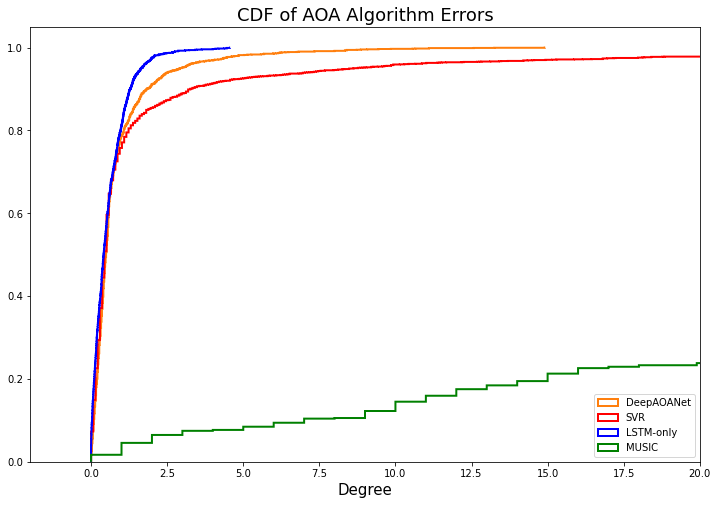

In [89]:
%matplotlib inline
fig_hist, ax_hist = plt.subplots(1,1, figsize=(12,8))

n, bins, patches = ax_hist.hist(y_err_series, density=True, cumulative = True, histtype='step', \
                                bins=1000, color='tab:orange', linewidth=2, label='DeepAOANet')
patches[0].set_xy(patches[0].get_xy()[:-1])
n2, bins2, patches2 = ax_hist.hist(y_err_svr_series, density=True, cumulative = True, histtype='step', \
                                   bins=1000, color='red', linewidth=2, label='SVR')
patches2[0].set_xy(patches2[0].get_xy()[:-1])
n3, bins3, patches3 = ax_hist.hist(y_err_lstm_series, density=True, cumulative = True, histtype='step', \
                                   bins=1000, color='b', linewidth=2, label='LSTM-only')
patches3[0].set_xy(patches3[0].get_xy()[:-1])
n4, bins4, patches4 = ax_hist.hist(y_err_music_series, density=True, cumulative = True, histtype='step', \
                                   bins=1000, color='g', linewidth=2, label='MUSIC')
patches4[0].set_xy(patches4[0].get_xy()[:-1])

ax_hist.set_title("CDF of AOA Algorithm Errors", fontsize=18)
ax_hist.set_xlabel("Degree", fontsize=15)
ax_hist.set_xlim(-2, 20)
ax_hist.legend(loc='lower right')

fig_hist.savefig(join(load_dir, 'CDF.png'), facecolor="w", bbox_inches='tight')
plt.show()

## Validation on Unseen Data

In [94]:
test_dict = {}
test_dir = 'data_1606'

for filename in os.listdir(test_dir):
    if filename.startswith("test_m") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(test_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        test_dict[- float(filename[6:-4])] = aoa_Rjk
    elif filename.startswith("test_") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(test_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        test_dict[float(filename[5:-4])] = aoa_Rjk

In [104]:
test_sig = {}
test_sig_index = {}

for key in test_dict.keys():
    test_dict[key]['theta'] = key * math.pi / 180
    test_sig_index[key] = (test_dict[key][abs(test_dict[key]['field.data2']) < field_thres].index)
    test_sig[key] = test_dict[key].iloc[test_sig_index[key], :]

Xtest = pd.concat([test_sig[rad] for rad in test_dict.keys()], \
                 keys=[rad for rad in test_dict.keys()], names=['Series name', 'Row ID'])
Xtest['music'] = pd.Series([0] * len(Xtest.index))

/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [127]:
Xtest_arr, ytest_lst2, Xtest_vec, ytest_vec = Split_TimeSeries3(Xtest, aoa_gt_series=range(-45, 90, 45))

(2949, 3, 20) 2949


In [128]:
# Normalization
Xtest_arr_std = mmsc.transform(Xtest_arr.reshape(-1, Xtest_arr.shape[-1])).reshape(Xtest_arr.shape)

ytest_lst = [item[0] for item in ytest_lst2]
ytest_lst_std = (ytest_lst - ymin)/(ymax-ymin)

In [129]:
# LSTM-only
pred_Xtest_arr_std = model.predict(Xtest_arr_std)
pred_ytest_lst = pred_Xtest_arr_std*(ymax - ymin) + ymin

pred_ytest_lst

array([[-0.30625075],
       [-0.30625367],
       [-0.30624783],
       ...,
       [-0.30624515],
       [-0.3062449 ],
       [-0.30624473]], dtype=float32)

In [130]:
rmse_lstm = np.sqrt(mean_squared_error(ytest_lst, pred_ytest_lst))
print("RMSE of LSTM-only: ", rmse_lstm)
print("I.E. %.04f degree of mean error" % (rmse_lstm/math.pi*180))

RMSE of LSTM-only:  0.8443467097313703
I.E. 48.3775 degree of mean error


In [135]:
ytest_lst

[-0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.7853981633974483,
 -0.785398